In [19]:
#import sys
#sys.path.append('D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/')

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
import sys
sys.path.append('/content/drive/My Drive/Code/data_aumentation_for_author_profiling/')

In [22]:
from word_level_da.preprocessing.load_data import Dataset

In [23]:
 %load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
 %autoreload 2

In [25]:
! pip install multidict

## Explore data

In [26]:
from word_level_da.classifier.explore_data import explore_data
from word_level_da.classifier.feature_extraction import FeatureExtraction
from word_level_da.classifier.svm_text import Svm_Text

## Clave del conjunto de datos

In [27]:
key="depresion18_drive"

In [28]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

In [29]:
all_training= data_cls.get_dataset(folder_name="prep_chunks_joined", truth_name="train_golden_truth_joined.txt",
                              partition="training")

In [32]:
exp_cls=explore_data(all_training[0], all_training[1], "/", plot_format="png")

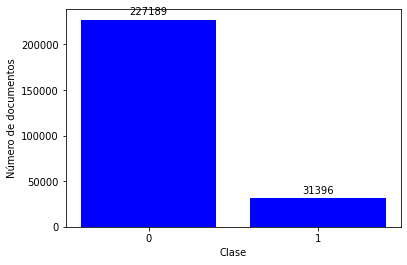

In [34]:
exp_cls.plot_class_distribution()

## Palabras con puntuacion Xi2 < 0.001 (Conjunto original)

In [35]:
 %autoreload 2

In [36]:
p_confidence=0.001
save_words=False
K=None

In [37]:
obj_dir = r"D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling\word_level_da\obj"

In [38]:
ft1 = FeatureExtraction(all_training[0], stop_wors=None, use_idf=True)
top_s = ft1.get_chi_2(all_training[1], k=K)

In [39]:
top_original=top_s[top_s["pval"]<0.001]

In [40]:
top_original

,score,pval
depression,787.990749,0.000000
my,608.866238,0.000000
me,437.929142,0.000000
im,387.057413,0.000000
anxiety,337.770951,0.000000
...,...,...
pudge,10.861150,0.000982
un,10.860853,0.000982
story,10.859445,0.000983
union,10.854125,0.000986


### Promedio del valor Chi cuadrada

In [41]:
top_s[top_s["pval"]<0.001]["score"].mean()

30.98885996759263

In [42]:
top_s[top_s["pval"]<0.001]["score"].std()

45.54563877033351

## Palabras con puntuacion Xi2 < 0.001 (Conjunto filtrado)

In [46]:
filtered_data= data_cls.get_dataset(folder_name="prep_chunks_filtered", truth_name="golden_truth_filtered.txt",
                              partition="training")

In [47]:
exp_cls=explore_data(filtered_data[0], filtered_data[1], "/", plot_format="png")

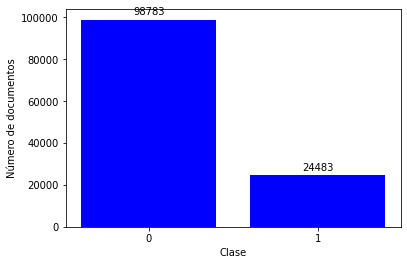

In [48]:
exp_cls.plot_class_distribution()

In [49]:
ft1 = FeatureExtraction(filtered_data[0], stop_wors=None, use_idf=True)
top_filtered = ft1.get_chi_2(filtered_data[1], k=K)

***Solo 401 terminos son significantes despues del filtrado***

In [50]:
top_filtered[top_filtered["pval"]<0.001]

,score,pval
depression,406.479297,0.000000
my,194.746319,0.000000
anxiety,163.138978,0.000000
relationship,158.343738,0.000000
boyfriend,130.309752,0.000000
...,...,...
psych,10.859072,0.000983
national,10.857342,0.000984
cars,10.855052,0.000985
moisturized,10.853590,0.000986


In [51]:
top_original_filtered=top_filtered.loc[top_filtered.index.intersection(list(top_original.index))]

In [52]:
top_original_filtered

,score,pval
depression,406.479297,0.000000
my,194.746319,0.000000
anxiety,163.138978,0.000000
relationship,158.343738,0.000000
boyfriend,130.309752,0.000000
...,...,...
thats,0.030244,0.861937
some,0.008471,0.926670
all,0.006680,0.934861
convergence,0.000598,0.980485


In [53]:
top_original.loc["got"]

score    19.237377
pval      0.000012
Name: got, dtype: float64

## Promedio del valor Chi cuadrada (Conjunto filtrado)

In [54]:
top_original_filtered.score.mean()

12.966919051258143

In [55]:
top_original_filtered.score.std()

20.111151873959585

## Valores CHi cuadrada para el conjunto aumentado

In [56]:
import numpy as np

In [57]:
all_scores=[]

In [58]:
methods=["Xi"]

In [59]:
for method in methods:
    for i in range (1,11):
        prefix = method + str(i)
        folder = method + "/" + prefix
        truth_file = method + "/" + prefix + ".txt"
        docs, l_docs, ids, useless_data = data_cls.get_dataset(folder_name=folder, truth_name=truth_file,
                                                           partition="augmented")

        new_training = np.append(filtered_data[0], docs)
        new_labels = np.append(filtered_data[1], l_docs)

        ft1 = FeatureExtraction(new_training, stop_wors=None, use_idf=True)
        top_sm = ft1.get_chi_2(new_labels, k=K)

        all_scores.append(top_sm)

In [60]:
len(all_scores)

10

In [63]:
all_scores[0][all_scores[0].pval<0.001]

,score,pval
depression,413.801609,0.000000
my,303.815101,0.000000
anxiety,237.300253,0.000000
cant,219.683745,0.000000
me,200.915189,0.000000
...,...,...
candidates,10.856055,0.000985
wasd,10.846726,0.000990
sgs,10.844637,0.000991
despised,10.844006,0.000991


### Numero de palabras con p<0.001 para cada aumento n=[1,10]

In [64]:
import matplotlib.pyplot as plt

In [65]:
x=[i for i in range(1,11)]

In [66]:
y=[len(score[score.pval<0.001]) for score in all_scores]

In [67]:
y

[697, 964, 1226, 1433, 1602, 1782, 1957, 2151, 2326, 2522]

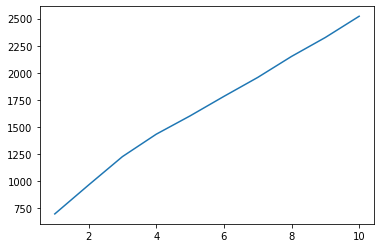

In [68]:
plt.plot(x,y)

### Puntuación CHi2 promedio en cada aumento n=[1,10] 

In [69]:
mean_all_scores=[score[score.pval<0.001].score.mean() for score in all_scores]

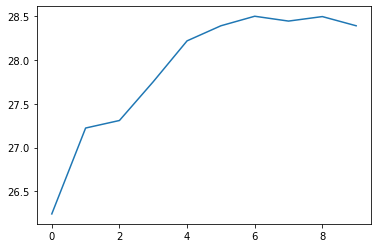

In [70]:
plt.plot(mean_all_scores)

### Numero de palabras que se siguen conservando del conjunto original

In [71]:
original_words_scores=[score.loc[score.index.intersection(list(top_original.index))] for score in all_scores]

In [72]:
original_words_scores[0][original_words_scores[0].pval<0.001]

,score,pval
depression,413.801609,0.000000
my,303.815101,0.000000
anxiety,237.300253,0.000000
cant,219.683745,0.000000
me,200.915189,0.000000
...,...,...
adorable,10.876140,0.000974
child,10.865934,0.000979
wasd,10.846726,0.000990
sgs,10.844637,0.000991


In [73]:
y1=[len(score[score.pval<0.001]) for score in original_words_scores]

In [74]:
y1

[515, 568, 590, 603, 623, 624, 637, 642, 646, 653]

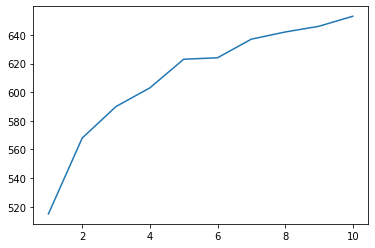

In [75]:
plt.plot(x,y1)

***Variacion promedio de los valores de chi cuadrada en cada aumento***

In [76]:
mean_scores=[values.score.mean() for values in original_words_scores]

In [77]:
mean_scores

[17.246408610438046,
 20.554305924510736,
 23.106525886300073,
 25.214058458527475,
 26.95864556570365,
 28.51898174930107,
 29.906182410065277,
 31.129282986952465,
 32.31603109692449,
 33.36913742963649]

In [78]:
no_aumento=[top_original_filtered.score.mean()]*10

In [79]:
no_aumento

[12.966919051258143,
 12.966919051258143,
 12.966919051258143,
 12.966919051258143,
 12.966919051258143,
 12.966919051258143,
 12.966919051258143,
 12.966919051258143,
 12.966919051258143,
 12.966919051258143]

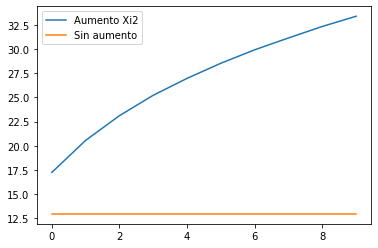

In [80]:
plt.plot(mean_scores)
plt.plot(no_aumento)
plt.legend(["Aumento Xi2", "Sin aumento"])

***Variacion promedio de los valores p en cada aumento***

In [81]:

mean_pvalues=[values.pval.mean() for values in original_words_scores]

In [82]:
mean_pvalues

[0.03173298608574092,
 0.028582613560111825,
 0.026574822059645863,
 0.02530371383038211,
 0.024285636915191058,
 0.023196126933830382,
 0.022881465228331777,
 0.022569112320596458,
 0.022343278667287976,
 0.022482661910531228]

In [83]:
no_aumento2=[top_original_filtered.pval.mean()]*10

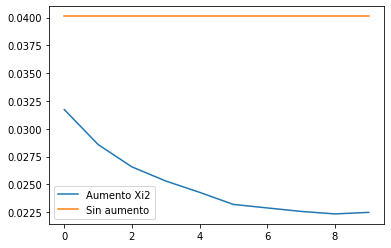

In [84]:
plt.plot(mean_pvalues)
plt.plot(no_aumento2)
plt.legend(["Aumento Xi2", "Sin aumento"])

***Podria decirse que la probabilidad de los terminos originales apartir de 5 no cambia***